Yu-Chun Chen, A13356506

Yanyu Tao, A13961185


# Mini-project 1, DSC 170, Spring 2019
## Geometric manipulations in Geopandas, projections, creating maps


You are looking for three relatively large parks, which are the closest to the UCSD's CSE Department building. More generally, you'll need to write a function that will return N polygons, each of which has area A or larger, for an arbitrary point specified in Latitude and Longitude. In addition, you will show the selected parks on a map, along with that arbitrary point, and distance buffers around the point. You may then also call folium to show the same data as an interactive map.

You will import geopandas, pandas, shapely, and folium.

Create at least two functions, one to generate a geodataframe with the nearest polygons, another to create a map:

```python
def closest_polys (point_lat, point_lon, polys_gdf, area_field, area_field_unit, min_area_miles, number_of_polys):
    return gdf_of_selected_polys_closestN, point_gdf
```

in this function:
* point_lat and point_lon are coordinates of the arbitrary point of interest. For the CSE dept building you can find the latitude and longitude using Google maps, geojson.io, or other sources. 
* polys_gdf: geopandas geodataframe, which you instantiated with the San Diego parks data from SanDAG (feel free to  use the copy we already downloaded and use in the lecture, or download from sandag.org)

* area_field: the field in the dataframe that you will use to select polygons based on their size (in our case, this field is 'GIS_ACRES')  

* area_field_unit: in the dataframe it is shown in acres, so set area_field_unit = 'acre'
* min_area_miles: the minimal size of the park polygons we are interested in, in square miles. Let's say, we are interested in parks which are 0.5 sq miles of larger
* number_of_polys: the number of the closest parks to return. Let's say we are interested in 3 parks. 

To be returned:
* geopandas gdf for the N selected parks
* geopandas gdf for the point of interest (we need that to enter in the next function.)


The second function will create a map of the parks and return a map object consisting of multiple layers.   

```python
def map_parks (polys_gdf, choropelth_field, prop_symbol_field, num_props, point_gdf, buffers, maptitle):
    return map_object
```

The inputs are:
* polys_gdf: same as above
* point_gdf: as returned from the function above.
* choropleth_field: a column in the polygon geodataframe with values that we will use to show as a choropleth map layer. In our case, let's use 'PARK_TYPE' to show classes of parks with different colors.
* prop_symbol_field: a column in the polygon geodataframe with values that we will use to show as a proportional symbol layer rendered over the choropleth layer. Let's use 'GIS_ACRES' so that proportional symbols reflect the size of the parks. 
* num_props: we will use proportional symbols to show not all parks but N largest parks, this is the number of the parks to show.
* buffers: a list of buffer distances from our point of interest that we'll also show on the map. For example, use buffers = [10,20,30], which would mean that the map should include concentric circles with radii of 10 miles, 20 miles, 30 miles, centered on the point of interest.
* maptitle: the title to show above the map.

The output map object should have at least the following layers (in the order of drawing):
* parks, with colors showing park types (include a legend)
* representative points for the first N largest parks, with size of circles proportional to the park size
* distance buffers of different size centered on the initial point of interest. Use different transparency values to show the distance buffers. 
* The point of interest itself.

Note the following considerations:
* An arbitrarily selected point may be within a park (even on a park boundary - though that is not too likely), but this park may not satisfy the size criteria
* Be careful about projections used for different data frames, and distance units. Geometric operations would only make sense if the different data frames are in the same projection, and the distance units are those recognized by the projection. You will have to convert between miles, feet, sqmiles, acres, etc. Note that San Diego data are in California State Plane Zone 6 - see http://spatialreference.org/ref/epsg/nad83-california-zone-6-ftus/. It is epsg:2230 (really, you should figure this out using geopandas.)
* the map should contain several common map elements - but at least a title
* add comments to each step in your code
* try to see if you can make it run faster (for extra credit)


Questions for extra credit:
1. This problem can be solved in more than one way. Can you think of another plan than what you implemented?
1. Looking back, where can you make this process run faster? Think about the choices you made, especially with respect to expensive operations.
1. Create the same map in Folium (remember how you did this in DSC80 - but also look at Folium examples in the lecture and at https://github.com/python-visualization/folium)

In [1]:
# Stub code for part 1

%matplotlib inline 
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import folium

def closest_polys (point_lat, point_lon, polys_gdf, area_field, area_field_unit, min_area_miles, number_of_polys):
    
    return gdf_of_selected_polys_closestN,point_gdf

In [2]:
shpFileIn = '/datasets/dsc170sp19-public/sandiego/parks/PARKS.shp'
sd_parks = gpd.read_file(shpFileIn)


In [4]:
# YOUR CODE HERE
def closest_polys (point_lat, point_lon, polys_gdf, area_field, area_field_unit, min_area_miles, number_of_polys):
    
    #unit conversion
    min_area = min_area_miles
    if area_field_unit == 'acre':
        min_area = min_area_miles * 640
    
    #park with areas greater than minimum area specified
    copy = polys_gdf.loc[polys_gdf[area_field] >= min_area].copy()
    
    #find nearest parks
    point = Point(point_lon, point_lat)
    copy = copy.to_crs({'init': 'epsg:4326'})
    copy['dist'] = copy.geometry.apply(lambda x: point.distance(x))
    gdf_of_selected_polys_closestN = copy.sort_values(by = 'dist').iloc[:number_of_polys].drop(columns=['dist'])
    
    #create gdf for point
    df = pd.DataFrame({'name' : ['point of interest'], 'geometry': [point]})
    point_gdf = gpd.GeoDataFrame(df, geometry = 'geometry')
    point_gdf.crs = {'init': 'epsg:4326'}
    
    return gdf_of_selected_polys_closestN,point_gdf

#raise NotImplementedError()

In [14]:
# Stub code for part 2

def map_parks (polys_gdf, choropelth_field, prop_symbol_field, num_props, point_gdf, buffers,maptitle):

#      your code here
    
    return map_object

In [3]:
# YOUR CODE HERE
def map_parks (polys_gdf, choropelth_field, prop_symbol_field, num_props, point_gdf, buffers,maptitle):
    
    #find the N largest parks (N = num_props)
    rep_points = polys_gdf.copy().sort_values(by = prop_symbol_field, ascending = False).iloc[:num_props]
    

    #plot the base map
    base = polys_gdf.plot(figsize = [25,25], column = choropelth_field, legend = True)
    base.set_title(maptitle)

    #plot the representative points according to the park sizes
    area_max = polys_gdf[prop_symbol_field].max()
    area_min = polys_gdf[prop_symbol_field].min()
    max_size = 2000
    min_size = 2
    rep_points.representative_point().plot(ax=base, marker='o', color='black', markersize=min_size + (max_size-min_size)*(rep_points[prop_symbol_field]/area_max))

    #set crs for the point of interest
    point = point_gdf.copy()
    point = point.to_crs({'init':'epsg:2230'})
    

    #plot the buffer
    for buff in buffers:
        point.buffer(buff*5280).plot(ax=base, edgecolor = 'salmon', alpha = 0.5, cmap = 'Pastel1')
        
    #plot the point of interest
    point.plot(ax=base, color = 'red')

    
    map_object = base
    
    return map_object
#raise NotImplementedError()

In [ ]:
# data for testing
lat = 32.8818051
lon = -117.2357122
min_sqmiles = 0.5
area_field = 'GIS_ACRES'
area_field_unit='acre'
sd_parks = gpd.read_file('../data/sandiego/parks/PARKS.shp')
count_of_parks = 3

selected_parks,point_gdf = closest_polys(lat,lon, sd_parks, area_field, area_field_unit, min_sqmiles, count_of_parks)

# selected_parks.head()
# point_gdf.head()

choropelth_field = 'PARK_TYPE'
prop_symbol_field = 'GIS_ACRES'
num_props = 100
buffers = [10,20,30]
maptitle = "San Diego Parks near a point"
map_parks = map_parks(sd_parks, choropelth_field, prop_symbol_field, num_props, point_gdf, buffers, maptitle)



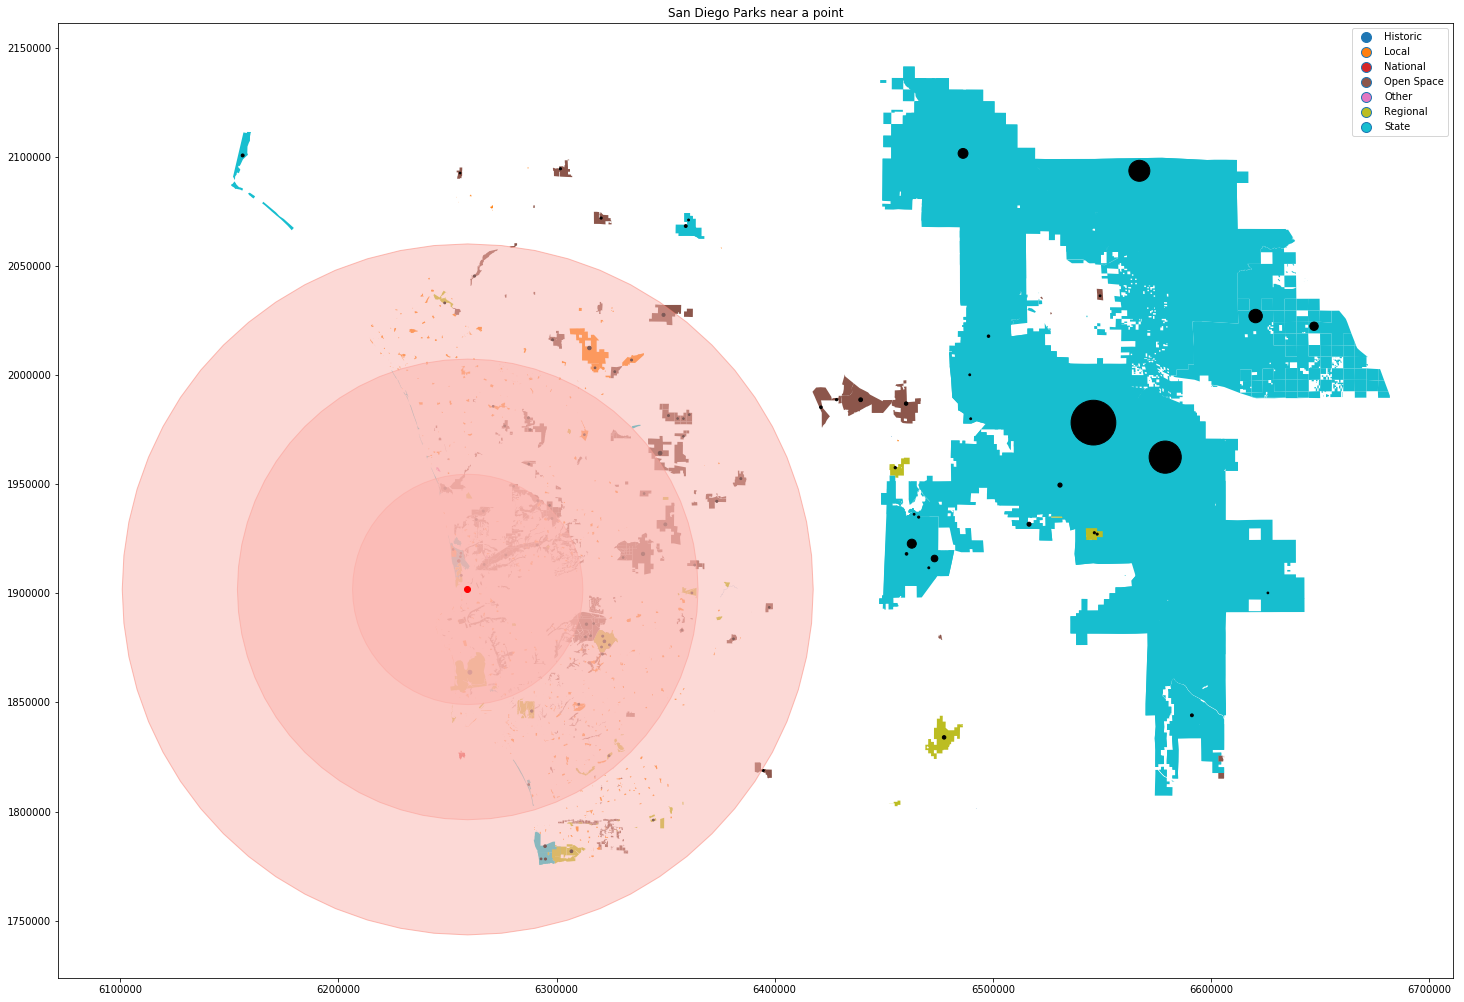

In [5]:
# data for testing
lat = 32.8818051
lon = -117.2357122
min_sqmiles = 0.5
area_field = 'GIS_ACRES'
area_field_unit='acre'
sd_parks = gpd.read_file('/datasets/dsc170sp19-public/sandiego/parks/PARKS.shp')
count_of_parks = 3

selected_parks,point_gdf = closest_polys(lat,lon, sd_parks, area_field, area_field_unit, min_sqmiles, count_of_parks)

# selected_parks.head()
# point_gdf.head()

choropelth_field = 'PARK_TYPE'
prop_symbol_field = 'GIS_ACRES'
num_props = 100
buffers = [10,20,30]
maptitle = "San Diego Parks near a point"
map_parks = map_parks(sd_parks, choropelth_field, prop_symbol_field, num_props, point_gdf, buffers, maptitle)



### Responses to the extra credit questions:

Your text here

2. Looking back at our code for closest_polys, we noticed that the most time-consuming part is changing the coordinate reference system of the geodatagrame. To make the process faster, we can change the coordinate reference system of the point of interest instead of the polys_gdf, which has much more geoseries to convert. 

In [22]:
# YOUR CODE HERE
#2
def closest_polys (point_lat, point_lon, polys_gdf, area_field, area_field_unit, min_area_miles, number_of_polys):
    
    #unit conversion
    min_area = min_area_miles
    if area_field_unit == 'acre':
        min_area = min_area_miles * 640
    
    #create gdf for point
    point = Point(point_lon, point_lat)
    df = pd.DataFrame({'name' : ['point of interest'], 'geometry': [point]})
    point_gdf = gpd.GeoDataFrame(df, geometry = 'geometry')
    point_gdf.crs = {'init': 'epsg:4326'}
    point_gdf = point_gdf.to_crs(polys_gdf.crs) #change the crs of the point
    
    #park with areas greater than minimum area specified
    copy = polys_gdf.loc[polys_gdf[area_field] >= min_area].copy()
    
    #find nearest parks
    point_interest = point_gdf.geometry.iloc[0]
    copy['dist'] = copy.geometry.apply(lambda x: point_interest.distance(x))
    gdf_of_selected_polys_closestN = copy.sort_values(by = 'dist').iloc[:number_of_polys].drop(columns=['dist'])
    
    
    
    return gdf_of_selected_polys_closestN,point_gdf

#raise NotImplementedError()


### Timekeeping:

### Please let us know how much time you spent on this project, in hours: 
### (we will only examine distributions and won't look at individual responses)

assignment_timespent =   
extracredit_timespent =   

YOUR ANSWER HERE  
assignment_timespent = 4hrs  
extracredit_timespent = 30min